<a href="https://colab.research.google.com/github/Chamod101/Tree_Stability_prediction/blob/main/Tree_Stability_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas scikit-learn xgboost openpyxl shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [45]:
import pandas as pd

# Load the Excel sheet
file_path = 'Tree_Dataset.xlsx'
df = pd.read_excel(file_path)

# Preview the data
print(df.head())


       SCINTIFIC_NAME        COMMON_NAME GENUS_NAME   FAMILY_NAME  \
0       Tilia cordata  Littleleaf linden      Tilia     Tiliaceae   
1    Quercus coccinea        Scarlet oak    Quercus      Fagaceae   
2      Quercus lyrata        Overcup oak    Quercus      Fagaceae   
3         Acer rubrum          Red maple       Acer   Sapindaceae   
4  Taxodium distichum       Bald cypress   Taxodium  Cupressaceae   

               DATE_PLANT               FACILITYID             VICINITY  WARD  \
0                     NaN  10390-430-3001-0103-000      4304 39TH ST NW     3   
1                     NaN  10380-437-3001-0041-000  opp 4401 38TH ST NW     3   
2  2021/03/15 18:24:57+00  11547-370-3001-0220-000    3728 BENTON ST NW     3   
3                     NaN  20520-080-3001-0743-000       856 52ND ST NE     7   
4  2018/10/26 14:46:42+00  25349-070-3001-0274-000      opp 725 L ST NE     6   

   TREE_BOX_LENGTH  TREE_BOX_WIDTH  ... CROWN_HIGHT_MEAN CROWN_BASE_MIN  \
0               10     

In [46]:
# Check for missing values
print(df.isnull().sum())


SCINTIFIC_NAME                     13
COMMON_NAME                        15
GENUS_NAME                         13
FAMILY_NAME                        14
DATE_PLANT                        297
FACILITYID                        135
VICINITY                            0
WARD                                0
TREE_BOX_LENGTH                     0
TREE_BOX_WIDTH                      0
WIRES                             320
CURB                              113
SIDEWALK                          123
TREE_BOX_STAT                       0
RETIREDDT                         387
DIAMETER_AT_BREAST_HEIGHT(DBH)      0
DISEASE                             0
PESTS                               0
CONDITION                           0
CONDITIODT                          1
CURRNET_WIND_SPEED                 25
TREE_NOTES                        120
CROWN_WIDTH                        14
CROWN_LENGTH                       14
CROWN_ORIENTATION                  14
MAX_CROWN_HEIGHT                   25
CROWN_HIGHT_

In [47]:
df['MAX_CROWN_HEIGHT'].fillna(df['MAX_CROWN_HEIGHT'].mean(), inplace=True)
df['CROWN_HIGHT_MEAN'].fillna(df['CROWN_HIGHT_MEAN'].mean(), inplace=True)
df['CROWN_BASE_MIN'].fillna(df['CROWN_BASE_MIN'].mean(), inplace=True)
df['GROUND_ELEVATION'].fillna(df['GROUND_ELEVATION'].mean(), inplace=True)
df['CROWN_PERIMETER'].fillna(df['CROWN_PERIMETER'].mean(), inplace=True)
df['CROWN_AREA'].fillna(df['CROWN_AREA'].mean(), inplace=True)
df['TREE_REMOVED_OR_FALLEN'].fillna(df['TREE_REMOVED_OR_FALLEN'].mode()[0], inplace = True)
df['SCINTIFIC_NAME'].fillna(df['SCINTIFIC_NAME'].mode()[0], inplace = True)
df['COMMON_NAME'].fillna(df['COMMON_NAME'].mode()[0], inplace = True)
df['GENUS_NAME'].fillna(df['GENUS_NAME'].mode()[0], inplace = True)
df['FAMILY_NAME'].fillna(df['FAMILY_NAME'].mode()[0], inplace = True)
df['CONDITION'].fillna(df['CONDITION'].mode()[0], inplace = True)
df['CURRNET_WIND_SPEED'].fillna(df['CURRNET_WIND_SPEED'].mean(), inplace=True)
df['CROWN_WIDTH'].fillna(df['CROWN_WIDTH'].mean(), inplace=True)
df['CURRNET_WIND_SPEED'].fillna(df['CURRNET_WIND_SPEED'].mean(), inplace=True)
df['CROWN_ORIENTATION'].fillna(df['CROWN_ORIENTATION'].mean(), inplace=True)
df['CROWN_LENGTH'].fillna(df['CROWN_LENGTH'].mean(), inplace=True)


<ipython-input-47-29c7817a6e53>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MAX_CROWN_HEIGHT'].fillna(df['MAX_CROWN_HEIGHT'].mean(), inplace=True)
<ipython-input-47-29c7817a6e53>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

In [48]:
df['CONDITIODT'] = pd.to_datetime(df['CONDITIODT'])


In [49]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_cols = ['SCINTIFIC_NAME', 'COMMON_NAME', 'GENUS_NAME', 'FAMILY_NAME', 'WIRES', 'CURB', 'SIDEWALK',
              'TREE_BOX_STAT', 'DISEASE', 'PESTS', 'CONDITION', 'SOIL_TYPE', 'TREE_REMOVED_OR_FALLEN']

# Apply label encoding
label_encoder = LabelEncoder()
for col in label_cols:
    df[col] = label_encoder.fit_transform(df[col])


In [50]:
# Drop unnecessary columns
df.drop(['SCINTIFIC_NAME','COMMON_NAME','GENUS_NAME','FAMILY_NAME','FACILITYID','WARD', 'VICINITY', 'TREE_NOTES', 'RETIREDDT', 'SIGN', 'WARRANTY'], axis=1, inplace=True)


In [51]:
df.drop(['DATE_PLANT'],axis=1, inplace=True)

In [52]:
# Check unique values in the ELEVATION column
print(df['ELEVATION'].unique())


['Unknown' 'Level' nan 'Raised with Structure' 'Below Grade']


In [53]:
# Handle categorical values in the ELEVATION column using label encoding
df['ELEVATION'] = df['ELEVATION'].astype('category')
df['ELEVATION'] = df['ELEVATION'].cat.codes  # Convert categories to numerical codes


In [54]:
# Convert datetime column to a timestamp
df['CONDITIODT'] = pd.to_datetime(df['CONDITIODT'], errors='coerce')  # Ensure proper conversion
df['CONDITIODT'] = df['CONDITIODT'].astype('int64') // 10**9  # Convert to seconds since epoch


In [55]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('TREE_REMOVED_OR_FALLEN', axis=1)
y = df['TREE_REMOVED_OR_FALLEN']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
model = XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


In [57]:
# Check the columns being used in the feature set (X)
print(X.columns)

Index(['TREE_BOX_LENGTH', 'TREE_BOX_WIDTH', 'WIRES', 'CURB', 'SIDEWALK',
       'TREE_BOX_STAT', 'DIAMETER_AT_BREAST_HEIGHT(DBH)', 'DISEASE', 'PESTS',
       'CONDITION', 'CONDITIODT', 'CURRNET_WIND_SPEED', 'CROWN_WIDTH',
       'CROWN_LENGTH', 'CROWN_ORIENTATION', 'MAX_CROWN_HEIGHT',
       'CROWN_HIGHT_MEAN', 'CROWN_BASE_MIN', 'GROUND_ELEVATION',
       'CROWN_PERIMETER', 'CROWN_AREA', 'ELEVATION', 'SOIL_TYPE'],
      dtype='object')


In [58]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8846153846153846
Confusion Matrix:
[[41  3]
 [ 6 28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        44
           1       0.90      0.82      0.86        34

    accuracy                           0.88        78
   macro avg       0.89      0.88      0.88        78
weighted avg       0.89      0.88      0.88        78



In [59]:
import pandas as pd

# Define a new record as a dictionary
new_record_1 = {
    'TREE_BOX_LENGTH': 99,  # Replace with actual tree box length
    'TREE_BOX_WIDTH': 13,  # Replace with actual tree box width
    'WIRES': 1,  # Encoded value for Wires (0/1 based on your encoding)
    'CURB': 0,  # Encoded value for Curb
    'SIDEWALK': 1,  # Encoded value for Sidewalk
    'TREE_BOX_STAT': 2,  # Encoded value for Tree box status
    'DIAMETER_AT_BREAST_HEIGHT(DBH)': 50.5,  # Replace with actual DBH
    'DISEASE': 0,  # Encoded value for Disease (0/1)
    'PESTS': 0,  # Encoded value for Pests
    'CONDITION': 1,  # Encoded value for Condition
    'CONDITIODT': 1660958400,  # Example timestamp for the date
    'CURRNET_WIND_SPEED': 30,  # Replace with actual wind speed
    'CROWN_WIDTH': 5.0,  # Replace with actual crown width
    'CROWN_LENGTH': 6.0,  # Replace with actual crown length
    'CROWN_ORIENTATION': 0,  # Encoded value for crown orientation
    'MAX_CROWN_HEIGHT': 25.0,  # Replace with actual max crown height
    'CROWN_HIGHT_MEAN': 15.0,  # Replace with actual crown height mean
    'CROWN_BASE_MIN': 8.0,  # Replace with actual crown base min
    'GROUND_ELEVATION': 10.0,  # Replace with actual ground elevation
    'CROWN_PERIMETER': 30.0,  # Replace with actual crown perimeter
    'CROWN_AREA': 120.0,  # Replace with actual crown area
    'ELEVATION': 2,  # Encoded value for Elevation
    'SOIL_TYPE': 1  # Encoded value for soil type (0/1 based on your encoding)
}

# Convert the dictionary into a DataFrame
new_record_df = pd.DataFrame([new_record_1])


In [60]:
# Make a prediction for the new record
prediction = model.predict(new_record_df)
print(prediction)

# Output the prediction
if prediction[0] == 1:
    print("The tree is likely to fall.")
else:
    print("The tree is not likely to fall.")


[0]
The tree is not likely to fall.


In [64]:
# Make a prediction with probabilities
prediction_proba = model.predict_proba(new_record_df)
print(f"Probability of falling: {prediction_proba[0][1]:.2f}")
print(f"Probability of not falling: {prediction_proba[0][0]:.2f}")

# Use these probabilities in your message
if prediction_proba[0][1] > 0.5:
    print("The tree is likely to fall with a probability of {:.2f}".format(prediction_proba[0][1]))
else:
    print("The tree is not likely to fall with a probability of {:.2f}".format(prediction_proba[0][0]))


Probability of falling: 0.31
Probability of not falling: 0.69
The tree is not likely to fall with a probability of 0.69


In [61]:
import shap
import pandas as pd

# Assuming you already trained the model and have your new record
# Reapply label encoding to the new record (as you did earlier)
new_record_df_encoded = pd.DataFrame([new_record_1]) # Your newly encoded record (from the previous step)

# Calculate SHAP values
explainer = shap.Explainer(model)  # Create a SHAP explainer using the trained model
shap_values = explainer(new_record_df_encoded)  # Calculate SHAP values for the new record

# Visualize the SHAP values
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], new_record_df_encoded)


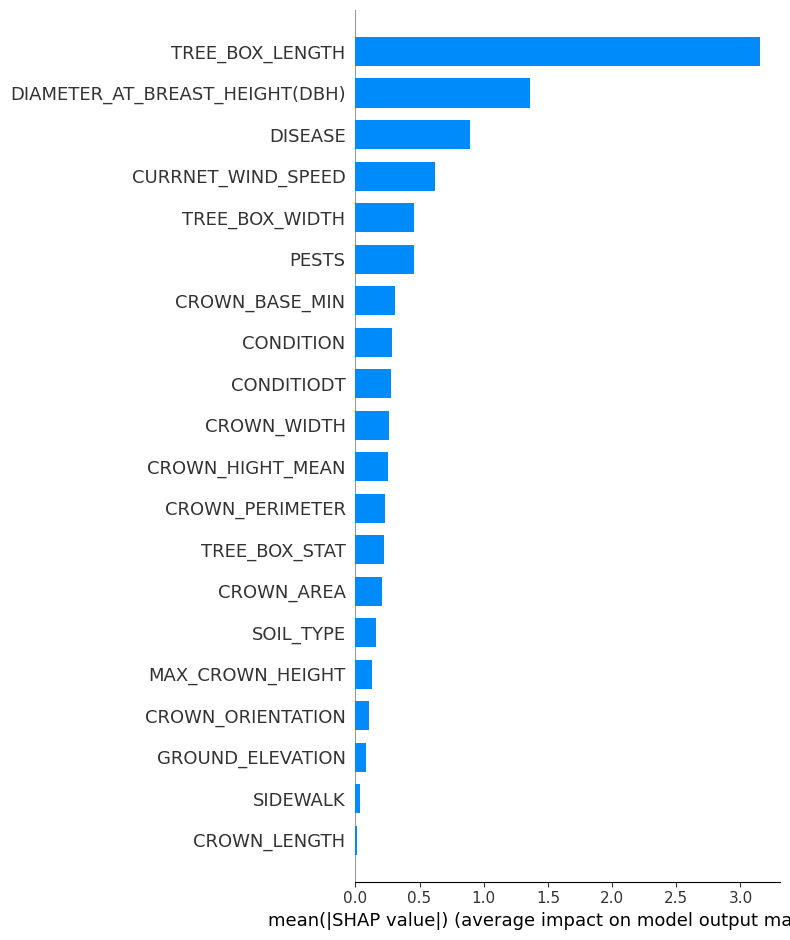

In [62]:
import matplotlib.pyplot as plt
import shap

# Plot the global feature importance for the model
shap.summary_plot(shap_values, X_train, plot_type="bar")


In [66]:
shap_values_summary = pd.DataFrame({
    'feature': X_train.columns,
    'shap_value': shap_values[0].values
}).sort_values(by='shap_value', ascending=False)

top_contributors = shap_values_summary.head(5)  # Show top 5 contributing features
print("Top contributing features for this prediction:")
print(top_contributors)


Top contributing features for this prediction:
                           feature  shap_value
6   DIAMETER_AT_BREAST_HEIGHT(DBH)    1.358318
7                          DISEASE    0.894635
8                            PESTS    0.455713
17                  CROWN_BASE_MIN    0.310716
9                        CONDITION    0.284079


In [67]:
# Sample plain language explanation
if prediction_proba[0][1] > 0.5:
    print(f"The tree is likely to fall because it has poor condition (SHAP: {top_contributors.iloc[0]['shap_value']:.2f}) and a high diameter at breast height (SHAP: {top_contributors.iloc[1]['shap_value']:.2f}).")
else:
    print(f"The tree is not likely to fall, as it has strong condition (SHAP: {top_contributors.iloc[0]['shap_value']:.2f}) and is well-supported by the tree box size (SHAP: {top_contributors.iloc[1]['shap_value']:.2f}).")


The tree is not likely to fall, as it has strong condition (SHAP: 1.36) and is well-supported by the tree box size (SHAP: 0.89).


In [68]:
# Prediction probability
prediction_proba = model.predict_proba(new_record_df)
print(f"Probability of falling: {prediction_proba[0][1]:.2f}")
print(f"Probability of not falling: {prediction_proba[0][0]:.2f}")

# Explanation using SHAP values
shap_values = explainer(new_record_df)
top_contributors = pd.DataFrame({
    'feature': X_train.columns,
    'shap_value': shap_values[0].values
}).sort_values(by='shap_value', ascending=False).head(3)

print("Top contributing factors for this prediction:")
for idx, row in top_contributors.iterrows():
    print(f"{row['feature']} contributed {row['shap_value']:.2f} towards the prediction.")

# Simple language explanation
if prediction_proba[0][1] > 0.5:
    print("The tree is likely to fall due to the following key factors:")
    for idx, row in top_contributors.iterrows():
        print(f"- {row['feature']}: {row['shap_value']:.2f} (contributing to the risk of falling)")
else:
    print("The tree is not likely to fall, but regular monitoring is advised.")


Probability of falling: 0.31
Probability of not falling: 0.69
Top contributing factors for this prediction:
DIAMETER_AT_BREAST_HEIGHT(DBH) contributed 1.36 towards the prediction.
DISEASE contributed 0.89 towards the prediction.
PESTS contributed 0.46 towards the prediction.
The tree is not likely to fall, but regular monitoring is advised.


In [69]:
model.save_model("tree_risk_model.json")
